In [633]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [635]:
os.chdir(r"C:\Users\mlesa\OneDrive\Desktop\download files")

In [637]:
df = pd.read_csv("loan_data.csv")

In [639]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [641]:
df = pd.get_dummies(df, columns = ['loan_intent','person_home_ownership', 'person_education'])

In [643]:
df

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,loan_intent_VENTURE,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master
0,22.0,female,71948.0,0,35000.0,16.02,0.49,3.0,561,No,...,False,False,False,False,True,False,False,False,False,True
1,21.0,female,12282.0,0,1000.0,11.14,0.08,2.0,504,Yes,...,False,False,False,True,False,False,False,False,True,False
2,25.0,female,12438.0,3,5500.0,12.87,0.44,3.0,635,No,...,False,True,False,False,False,False,False,False,True,False
3,23.0,female,79753.0,0,35000.0,15.23,0.44,2.0,675,No,...,False,False,False,False,True,False,True,False,False,False
4,24.0,male,66135.0,1,35000.0,14.27,0.53,4.0,586,No,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,47971.0,6,15000.0,15.66,0.31,3.0,645,No,...,False,False,False,False,True,True,False,False,False,False
44996,37.0,female,65800.0,17,9000.0,14.07,0.14,11.0,621,No,...,False,False,False,False,True,True,False,False,False,False
44997,33.0,male,56942.0,7,2771.0,10.02,0.05,10.0,668,No,...,False,False,False,False,True,True,False,False,False,False
44998,29.0,male,33164.0,4,12000.0,13.23,0.36,6.0,604,No,...,False,False,False,False,True,False,True,False,False,False


In [645]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
person_education_Associate        0
person_education_Bachelor         0
person_education_Doctorate        0
person_education_High School      0
person_education_Master           0
dtype: int64

In [647]:
df["person_gender"].replace({'female': 1,'male': 0}, inplace=True)
df["previous_loan_defaults_on_file"].replace({'Yes': 1,'No': 0}, inplace=True)
df["person_home_ownership_MORTGAGE"].replace({True: 1,False: 0}, inplace=True)
df["person_home_ownership_OTHER"].replace({True: 1,False: 0}, inplace=True)
df["person_home_ownership_OWN"].replace({True: 1,False: 0}, inplace=True)
df["person_home_ownership_RENT"].replace({True: 1,False: 0}, inplace=True)
df["person_education_Associate"].replace({True: 1,False: 0}, inplace=True)
df["person_education_Bachelor"].replace({True: 1,False: 0}, inplace=True)
df["person_education_Doctorate"].replace({True: 1,False: 0}, inplace=True)
df["person_education_Master"].replace({True: 1,False: 0}, inplace=True)
df["loan_intent_PERSONAL"].replace({True: 1,False: 0}, inplace=True)
df["loan_intent_MEDICAL"].replace({True: 1,False: 0}, inplace=True)


C:\Users\mlesa\AppData\Local\Temp\ipykernel_12092\1994874655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_gender"].replace({'female': 1,'male': 0}, inplace=True)
C:\Users\mlesa\AppData\Local\Temp\ipykernel_12092\1994874655.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["per

In [649]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
person_education_Associate        0
person_education_Bachelor         0
person_education_Doctorate        0
person_education_High School      0
person_education_Master           0
dtype: int64

In [651]:
correlation = df.corr(method="spearman")["loan_status"].sort_values(ascending=False)
correlation

loan_status                       1.000000
loan_percent_income               0.324309
loan_int_rate                     0.311440
person_home_ownership_RENT        0.255239
loan_amnt                         0.086746
loan_intent_DEBTCONSOLIDATION     0.084130
loan_intent_MEDICAL               0.065195
loan_intent_HOMEIMPROVEMENT       0.033838
person_home_ownership_OTHER       0.013645
person_education_Bachelor         0.004728
person_education_Doctorate        0.001833
person_education_High School      0.001277
person_gender                     0.000561
person_education_Associate       -0.002765
person_education_Master          -0.004741
credit_score                     -0.008431
cb_person_cred_hist_length       -0.020496
loan_intent_PERSONAL             -0.022488
person_emp_exp                   -0.027330
person_age                       -0.030378
loan_intent_EDUCATION            -0.064006
loan_intent_VENTURE              -0.085992
person_home_ownership_OWN        -0.093666
person_home

In [653]:
df = df.drop(columns = ['person_education_High School','loan_intent_VENTURE', ])

In [655]:
x.isnull().sum()

person_age                        0
person_gender                     0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_intent_DEBTCONSOLIDATION     0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
person_home_ownership_MORTGAGE    0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
person_education_Associate        0
person_education_Bachelor         0
person_education_Doctorate        0
person_education_Master           0
dtype: int64

In [657]:
x = df.drop(columns='loan_status')

In [659]:
y = df['loan_status']

In [661]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .25)

In [754]:
model = LogisticRegression(solver='newton-cholesky')
model.fit(x_train,y_train)


LogisticRegression(solver='newton-cholesky')

In [756]:
params = GBT.get_params()
params

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [777]:
accuracy = accuracy_score(y_test, ypred) 

In [779]:
accuract = accuracy_score(y_train, ytrain) 

In [781]:
accuracy 

0.8944888888888889

In [783]:
accuract

0.8971259259259259

In [786]:
ytrain= model.predict(x_train)
ypred = model.predict(x_test)

In [788]:
error = 1-accuracy 

In [790]:
errort = 1- accuract

In [792]:
error

0.10551111111111111

In [794]:
errort

0.10287407407407412

In [796]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [798]:
conf_marix = confusion_matrix(y_test, ypred)

<Figure size 800x600 with 0 Axes>

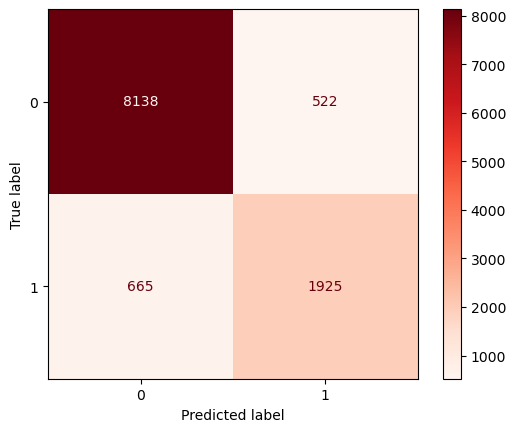

In [800]:
disp = ConfusionMatrixDisplay(conf_marix, display_labels = [0,1])
plt.figure(figsize = (8,6))

disp.plot(cmap = plt.cm.Reds)

plt.show()

In [283]:
accuracy = accuracy_score(y_test, ypred) 

In [552]:
accuracy

0.8980444444444444

In [602]:
dtree = DecisionTreeClassifier()

In [740]:
from sklearn.tree import DecisionTreeClassifier
tc = DecisionTreeClassifier(solver='newtwon-cholesky')
tc.fit(x_train,y_train)

TypeError: DecisionTreeClassifier.__init__() got an unexpected keyword argument 'solver'

In [706]:
 ypred1 = tc.predict(x_test)
 ytrain2 = tc.predict(x_train)
params = dtree.get_params()

In [708]:
params = dtree.get_params()
params

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [710]:
accuracy = accuracy_score(y_test, ypred1) 
accuracyt = accuracy_score(y_train, ytrain2) 
errort = 1- accuracyt
errort
error = 1- accuracy 
error

0.10462222222222217

In [712]:
accuracy

0.8953777777777778

In [714]:
accuracyt = accuracy_score(y_train, ytrain2) 

In [716]:
accuracyt

1.0

In [718]:
error = 1- accuracy 
error

0.10462222222222217

In [720]:
errort = 1- accuracyt

In [722]:
errort


0.0

In [726]:
Test_mse1 = mean_squared_error(y_test, ypred1)
print(f"Testing MSE: {Test_mse1}")


Testing MSE: 0.10462222222222223


In [728]:
conf_marix1 = confusion_matrix(y_test, ypred1)

In [730]:
accuracy1 = accuracy_score(y_test, ypred1) 

In [732]:
accuracy1

0.8953777777777778

<Figure size 800x600 with 0 Axes>

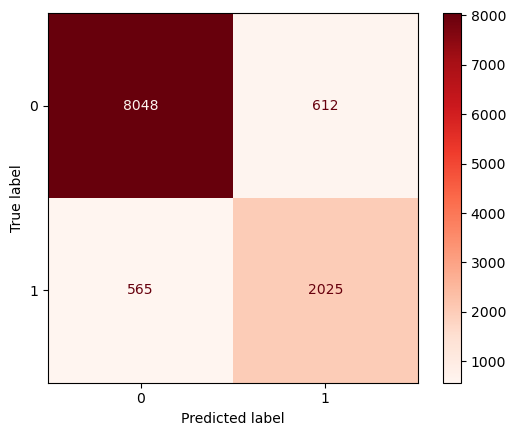

In [734]:
disp = ConfusionMatrixDisplay(conf_marix1, display_labels = [0,1])
plt.figure(figsize = (8,6))
disp.plot(cmap = plt.cm.Reds)

plt.show()

In [372]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)
RF.fit(x_train, y_train)
y_pred2 = RF.predict(x_test)
conf_marix = confusion_matrix(y_test, y_pred2)



<Figure size 800x600 with 0 Axes>

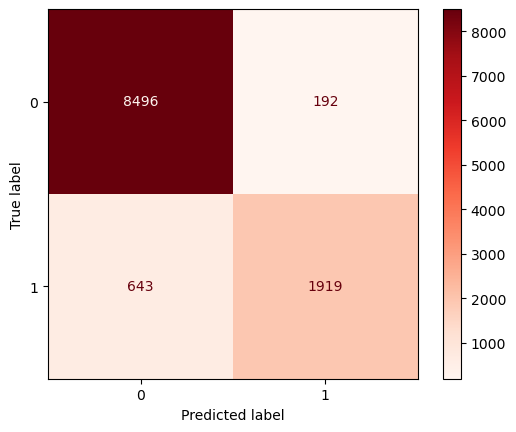

In [373]:
disp = ConfusionMatrixDisplay(conf_marix, display_labels = [0,1])
plt.figure(figsize = (8,6))
disp.plot(cmap = plt.cm.Reds)

plt.show()

In [376]:

 y_train3 = RF.predict(x_train)

In [378]:
accuracy = accuracy_score(y_test, y_pred2) 
accuracy
accuracyt = accuracy_score(y_train, y_train3) 
accuracyt
errort = 1- accuracyt
errort
error = 1- accuracy 
error


0.07422222222222219

In [380]:
errort = 1- accuracyt
errort

0.0

In [382]:
accuracyt

1.0

In [390]:
accuracy

0.9257777777777778

In [384]:
error = 1- accuracy 
error


0.07422222222222219

In [386]:
accuracy2 = accuracy_score(y_test, y_pred2) 

In [388]:
accuracy2 

0.9257777777777778

In [586]:
from sklearn.ensemble import GradientBoostingClassifier 
GBT = GradientBoostingClassifier()
GBT.fit(x_train,y_train)
y_pred3 = GBT.predict(x_test)
conf_marix = confusion_matrix(y_test, y_pred3)

<Figure size 800x600 with 0 Axes>

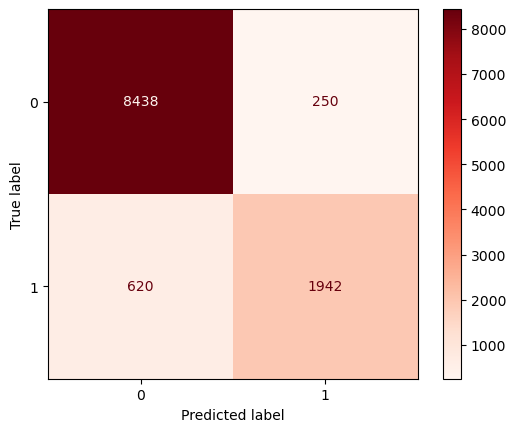

In [587]:
disp = ConfusionMatrixDisplay(conf_marix, display_labels = [0,1])
plt.figure(figsize = (8,6))
disp.plot(cmap = plt.cm.Reds)

plt.show()

In [588]:
accuracy3 = accuracy_score(y_test,y_pred3)

In [589]:
accuracy3

0.9226666666666666

In [404]:
error = 1-accuracy3
error

0.07733333333333337

In [410]:
accuracy43 = accuracy_score(y_train4, y_train)
accuracy43

0.9284148148148148

In [414]:
errort = 1-accuracy43
errort

0.0715851851851852

In [113]:
import pickle

# Assuming you have trained models: log_reg, rf, gbt, dt
models = {
    "logistic_regression": model,
    "random_forest": RF,
    "gradient_boosted": GBT,
    "decision_tree": tc
}

# Save each model
for name, model in models.items():
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(model, f)


In [115]:
df

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,loan_intent_MEDICAL,loan_intent_PERSONAL,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_Master
0,22.0,1,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0,1,0,0,0,1,0,0,0,1
1,21.0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,0,0,0,0,1,0,0,0,0,0
2,25.0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,1,0,1,0,0,0,0,0,0,0
3,23.0,1,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,1,0,0,0,0,1,0,1,0,0
4,24.0,0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,0,47971.0,6,15000.0,15.66,0.31,3.0,645,0,...,1,0,0,0,0,1,1,0,0,0
44996,37.0,1,65800.0,17,9000.0,14.07,0.14,11.0,621,0,...,0,0,0,0,0,1,1,0,0,0
44997,33.0,0,56942.0,7,2771.0,10.02,0.05,10.0,668,0,...,0,0,0,0,0,1,1,0,0,0
44998,29.0,0,33164.0,4,12000.0,13.23,0.36,6.0,604,0,...,0,0,0,0,0,1,0,1,0,0


In [117]:
    pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [118]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [416]:
# Define the model
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/50


C:\Users\mlesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1055/1055 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7258 - loss: 84.5279 - val_accuracy: 0.7726 - val_loss: 94.4434
Epoch 2/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7357 - loss: 37.5739 - val_accuracy: 0.7796 - val_loss: 33.3790
Epoch 3/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7318 - loss: 21.3281 - val_accuracy: 0.8028 - val_loss: 21.1022
Epoch 4/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7366 - loss: 20.3903 - val_accuracy: 0.7454 - val_loss: 8.9223
Epoch 5/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7370 - loss: 10.4757 - val_accuracy: 0.6785 - val_loss: 3.6403
Epoch 6/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7480 - loss: 6.2914 - val_accuracy: 0.7827 - val_loss: 1.7435
Epoch 7/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7420 - loss: 4.7579 - val_accuracy: 0.4744 - val_loss: 3.4989
Epoch 8/50
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7348 - loss: 3.0524 - va

In [162]:

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.8582 - loss: 0.3772
Test Accuracy: 0.8589


In [164]:
sample_input = x_test  # Take one example from test data
prediction = model.predict(sample_input)
predicted_class = (prediction > 0.5).astype(int)
print(f"Predicted Class: {predicted_class[0][0]}")

352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step
Predicted Class: 1


In [417]:
ytrain5 = (model.predict(x_train) > 0.5).astype(int)
y_pred1 = (model.predict(x_test) > 0.5).astype(int)

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [472]:
accuracy = accuracy_score(y_pred1, y_test)
accuracyt2 = accuracy_score(y_train, ytrain5)

In [474]:
accuracy


0.7722666666666667

In [476]:
error = 1-accuracy
error

0.22773333333333334

In [478]:
errort = 1-accuracyt2
errort

0.22038518518518524

In [433]:
accuracy

0.7722666666666667

In [172]:
train_mse1 = mean_squared_error(y_train, ytrain5)
print(f"Training MSE: {Test_mse1}")
Test_mse1 = mean_squared_error(y_test, y_pred1)
print(f"Testing MSE: {Test_mse1}")


Training MSE: 0.22773333333333334
Testing MSE: 0.14106666666666667


In [174]:
conf = confusion_matrix(y_pred1, y_test) 

In [176]:
conf1 = confusion_matrix(y_pred1, y_test) 

<Figure size 800x600 with 0 Axes>

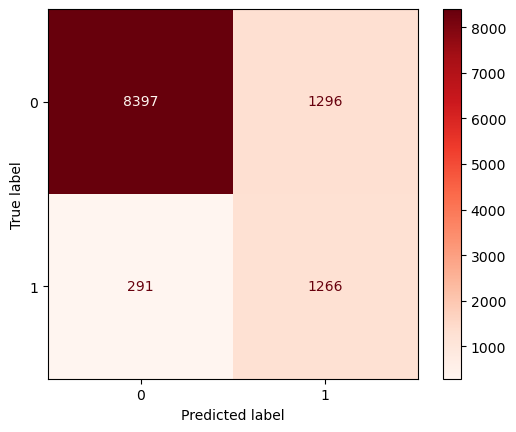

In [177]:
disp = ConfusionMatrixDisplay(conf, display_labels = [0,1])
plt.figure(figsize = (8,6))
disp.plot(cmap = plt.cm.Reds)

plt.show()

<Figure size 800x600 with 0 Axes>

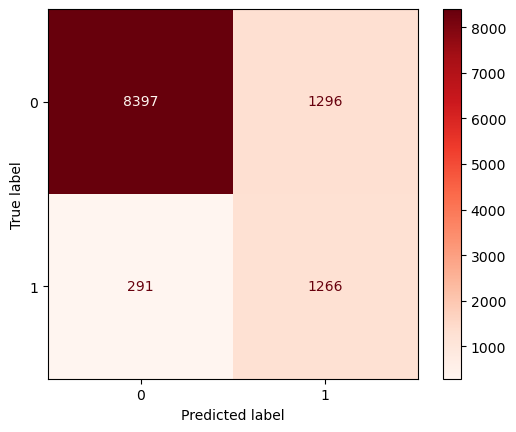

In [131]:
disp = ConfusionMatrixDisplay(conf1, display_labels = [0,1])
plt.figure(figsize = (8,6))
disp.plot(cmap = plt.cm.Reds)
plt.show()

In [435]:
# Define the model
nn2 = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

# Compile the model
nn2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = nn2.fit(x_train, y_train, epochs=100, batch_size= 64, validation_data=(x_test, y_test))

Epoch 1/100


C:\Users\mlesa\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7132 - loss: 56.7209 - val_accuracy: 0.7920 - val_loss: 7.9898
Epoch 2/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7307 - loss: 20.1678 - val_accuracy: 0.7532 - val_loss: 15.6439
Epoch 3/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7257 - loss: 17.1088 - val_accuracy: 0.7722 - val_loss: 26.2628
Epoch 4/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7388 - loss: 16.2932 - val_accuracy: 0.8197 - val_loss: 12.1393
Epoch 5/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7370 - loss: 12.7370 - val_accuracy: 0.7811 - val_loss: 6.7259
Epoch 6/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7441 - loss: 11.3461 - val_accuracy: 0.7723 - val_loss: 46.1296
Epoch 7/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7418 - loss: 14.8640 - val_accuracy: 0.7762 - val_loss: 7.6255
Epoch 8/100
528/528 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7294 - loss: 11.4684 - val_accu

In [827]:
ytrain22 = (nn2.predict(x_train) > 0.5).astype(int)
y_pred3 = (nn2.predict(x_test) > 0.5).astype(int)

1055/1055 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
352/352 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step


In [829]:
accuracy = accuracy_score(y_pred3, y_test)
accuracyt2 = accuracy_score(y_train, ytrain22)
accuracy

0.7697777777777778

In [831]:
error = 1-accuracy 
error

0.23022222222222222

In [833]:
errort = 1-accuracyt2
errort


0.2195555555555555

In [835]:

conf3 = confusion_matrix(y_pred3, y_test) 

<Figure size 800x600 with 0 Axes>

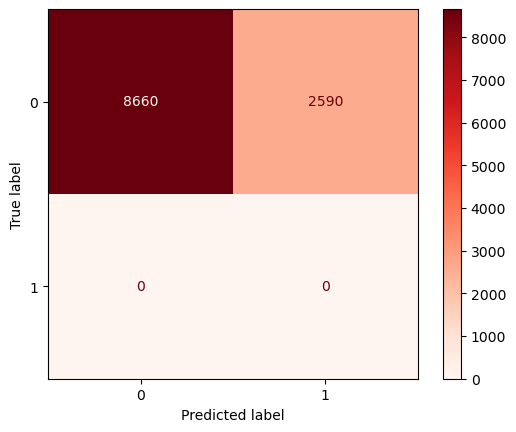

In [837]:
disp = ConfusionMatrixDisplay(conf3, display_labels = [0,1])
plt.figure(figsize = (8,6))
disp.plot(cmap = plt.cm.Reds)

plt.show()

In [808]:
accuracy = accuracy_score(y_pred3, y_test)

In [810]:
accuracy

0.6698666666666667

<Figure size 800x600 with 0 Axes>

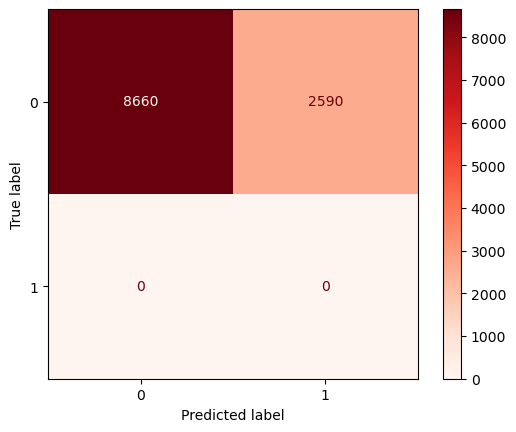

In [839]:
disp = ConfusionMatrixDisplay(conf3, display_labels = [0,1])
plt.figure(figsize = (8,6))
disp.plot(cmap = plt.cm.Reds)

plt.show()

In [814]:
train_mse1 = mean_squared_error(y_train, ytrain22)
print(f"Training MSE: {train_mse1}")
Test_mse1 = mean_squared_error(y_test, y_pred3)
print(f"Testing MSE: {Test_mse1}")


Training MSE: 0.21955555555555556
Testing MSE: 0.33013333333333333
